In [1529]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [1530]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [1531]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1532]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [1533]:
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [1534]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


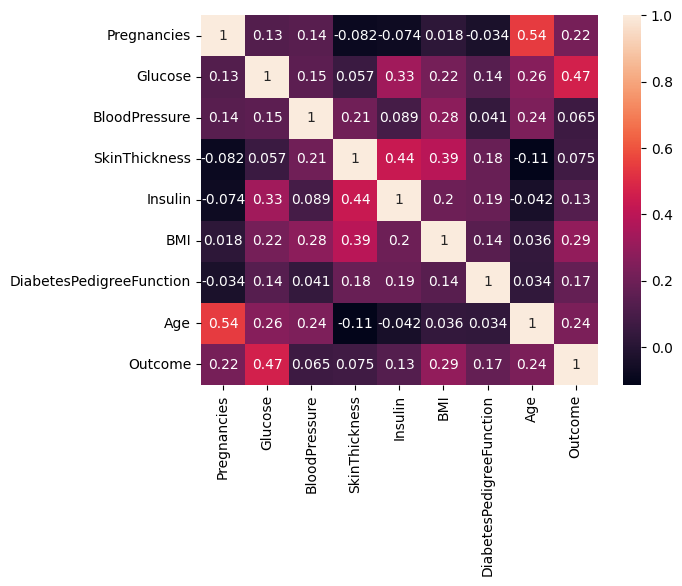

In [1535]:
sns.heatmap(data=diabetes_dataset.corr(),annot=True)
plt.show()

In [1536]:
for feature in diabetes_dataset.columns:
      Q1 = diabetes_dataset[feature].quantile(0.25)
      Q3 = diabetes_dataset[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR

      if (diabetes_dataset[feature] >= upper).any():
          print(feature, "yes")  # Outlier exists
      else:
          print(feature, "no")   # No outlier


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

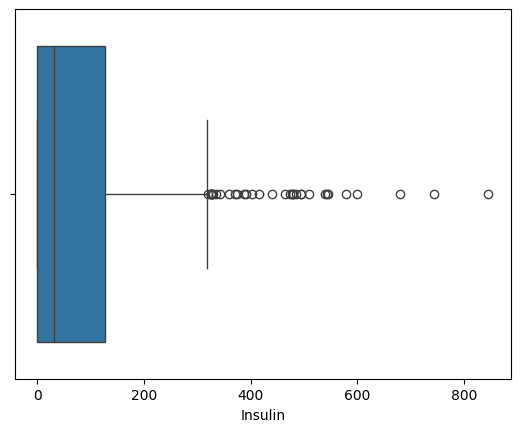

In [1537]:
sns.boxplot(x='Insulin',data=diabetes_dataset)

In [1538]:
diabetes_dataset.shape

(768, 9)

In [1539]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = diabetes_dataset.quantile(0.25)
Q3 = diabetes_dataset.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with any outlier
diabetes_dataset = diabetes_dataset[~((diabetes_dataset < lower_bound) | (diabetes_dataset > upper_bound)).any(axis=1)]
diabetes_dataset.reset_index(drop=True, inplace=True)

# Optional: Check updated shape
print("Dataset shape after removing outliers:", diabetes_dataset.shape)


Dataset shape after removing outliers: (639, 9)


<Axes: xlabel='Insulin'>

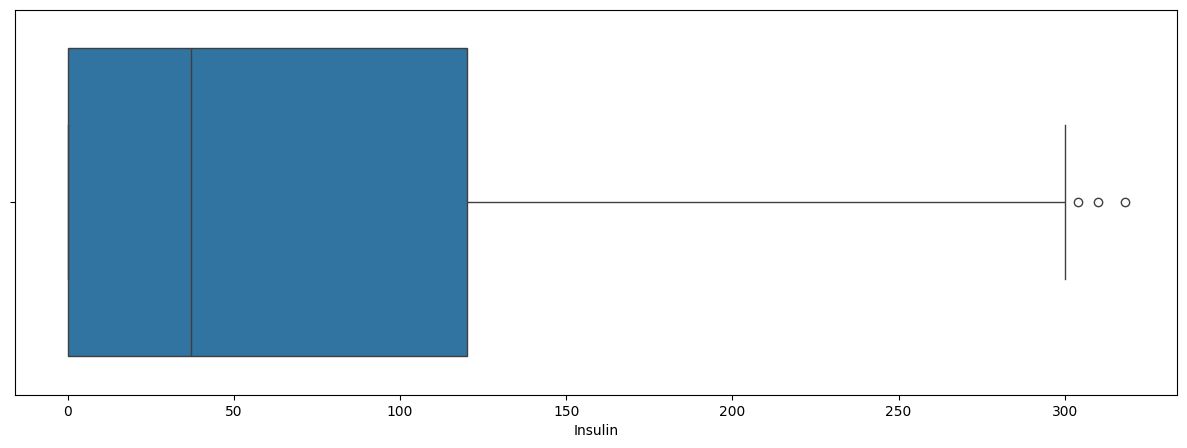

In [1540]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Insulin',data=diabetes_dataset)

In [1541]:
X = diabetes_dataset.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63
635,2,122,70,27,0,36.8,0.340,27
636,5,121,72,23,112,26.2,0.245,30
637,1,126,60,0,0,30.1,0.349,47


In [1542]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,0
...,...
634,0
635,0
636,0
637,1


In [1543]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.673824,0.991351,-0.010626,0.941847,-0.829247,0.247974,0.788892,1.561132
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
2,1.287615,2.192476,-0.716106,-1.341558,-0.829247,-1.354158,0.968346,-0.064594
3,-0.860651,-1.033403,-0.539736,0.158965,0.353035,-0.607533,-1.045526,-1.058093
4,0.366929,-0.106820,0.165744,-1.341558,-0.829247,-0.996400,-0.909939,-0.245230
...,...,...,...,...,...,...,...,...
634,1.901405,-0.621588,0.342113,1.789969,1.434699,0.139091,-1.029575,2.735268
635,-0.553756,0.099087,-0.186996,0.419926,-0.829247,0.745724,-0.355625,-0.516184
636,0.366929,0.064769,-0.010626,0.158965,0.579430,-0.903072,-0.734473,-0.245230
637,-0.860651,0.236358,-1.068846,-1.341558,-0.829247,-0.296440,-0.319735,1.290178


In [1544]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,0
...,...
634,0
635,0
636,0
637,1


In [1545]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6, random_state=2)

In [1546]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
431,1.594510,0.373630,-0.186996,-1.341558,-0.829247,0.341302,0.888589,1.109542
347,-0.553756,-0.141138,-0.716106,0.093725,-0.829247,-0.187557,-0.032608,-1.058093
463,0.673824,0.202040,0.342113,-1.341558,-0.829247,0.279084,-1.228968,1.922405
311,-0.860651,-0.347045,-1.068846,-0.819637,1.459853,-1.027509,2.065010,-1.058093
494,-1.167546,-1.788395,0.342113,-1.341558,-0.829247,2.067872,-0.937854,1.199860
...,...,...,...,...,...,...,...,...
534,-1.167546,2.055205,-1.950695,1.007087,1.170571,0.901271,0.102979,-0.967775
584,0.366929,0.236358,0.518483,0.419926,-0.552543,-0.374213,0.039173,0.657951
493,-1.167546,2.364065,0.871223,-0.428196,1.497586,-0.000901,1.008225,-0.967775
527,0.980720,-0.758860,0.342113,0.746127,0.315303,1.383466,1.761932,-0.064594


In [1547]:
Y_train

,Outcome
431,1
347,0
463,1
311,0
494,0
...,...
534,1
584,0
493,1
527,1


In [1548]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [1549]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[162  13]
 [ 40  41]]
Accuracy by confusion matrix: 0.79296875


                  precision    recall  f1-score   support

without diabetes       0.80      0.93      0.86       175
   with diabetes       0.76      0.51      0.61        81

        accuracy                           0.79       256
       macro avg       0.78      0.72      0.73       256
    weighted avg       0.79      0.79      0.78       256

----------------------------------------------------------------------


(77.80678851174935, 79.296875)

In [1550]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
gnb.score(X_train,Y_train)*100,gnb.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[142  33]
 [ 35  46]]
Accuracy by confusion matrix: 0.734375


                  precision    recall  f1-score   support

without diabetes       0.80      0.81      0.81       175
   with diabetes       0.58      0.57      0.57        81

        accuracy                           0.73       256
       macro avg       0.69      0.69      0.69       256
    weighted avg       0.73      0.73      0.73       256

----------------------------------------------------------------------


(77.28459530026109, 73.4375)

In [1551]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn.score(X_train,Y_train)*100,knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[152  23]
 [ 41  40]]
Accuracy by confusion matrix: 0.75


                  precision    recall  f1-score   support

without diabetes       0.79      0.87      0.83       175
   with diabetes       0.63      0.49      0.56        81

        accuracy                           0.75       256
       macro avg       0.71      0.68      0.69       256
    weighted avg       0.74      0.75      0.74       256

----------------------------------------------------------------------


(81.72323759791122, 75.0)

In [1552]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[140  35]
 [ 37  44]]
Accuracy by confusion matrix: 0.71875


                  precision    recall  f1-score   support

without diabetes       0.79      0.80      0.80       175
   with diabetes       0.56      0.54      0.55        81

        accuracy                           0.72       256
       macro avg       0.67      0.67      0.67       256
    weighted avg       0.72      0.72      0.72       256

----------------------------------------------------------------------


(100.0, 71.875)

In [1553]:
from sklearn import svm
svm = svm.SVC(kernel='poly')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm.score(X_train,Y_train)*100,svm.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[166   9]
 [ 45  36]]
Accuracy by confusion matrix: 0.7890625


                  precision    recall  f1-score   support

without diabetes       0.79      0.95      0.86       175
   with diabetes       0.80      0.44      0.57        81

        accuracy                           0.79       256
       macro avg       0.79      0.70      0.72       256
    weighted avg       0.79      0.79      0.77       256

----------------------------------------------------------------------


(81.72323759791122, 78.90625)

In [1554]:
mean_squared_error(Y_test,svm.predict(X_test)), mean_absolute_error(Y_test,svm.predict(X_test))

(0.2109375, 0.2109375)

In [1555]:
mean_squared_error(Y_test,dt.predict(X_test)), mean_absolute_error(Y_test,dt.predict(X_test))

(0.28125, 0.28125)

In [1556]:
mean_squared_error(Y_test,knn.predict(X_test)), mean_absolute_error(Y_test,knn.predict(X_test))

(0.25, 0.25)

In [1557]:
mean_squared_error(Y_test,gnb.predict(X_test)), mean_absolute_error(Y_test,gnb.predict(X_test))

(0.265625, 0.265625)

In [1558]:
mean_squared_error(Y_test,lr.predict(X_test)), mean_absolute_error(Y_test,lr.predict(X_test))

(0.20703125, 0.20703125)

In [1559]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
617,2.515195,-0.655906,1.047593,0.811367,0.491388,-0.311994,0.234579,1.199860
572,0.980720,0.339312,-0.363366,1.855209,0.742937,1.010153,0.039173,0.928905
1,-0.860651,-1.170674,-0.539736,0.550406,-0.829247,-0.840853,-0.311759,-0.154912
68,-0.553756,-0.655906,-0.363366,0.289446,0.063753,1.010153,-0.419431,-0.606502
37,0.980720,-0.552953,-0.539736,0.746127,-0.829247,1.103482,-0.339674,-0.154912
...,...,...,...,...,...,...,...,...
202,1.901405,0.099087,-0.363366,-1.341558,-0.829247,-0.125338,-0.682630,0.748269
288,-0.246861,-1.994303,0.871223,0.485166,-0.829247,0.372412,-0.742448,1.199860
620,-0.246861,2.329748,-0.186996,0.093725,1.686248,0.683505,-0.084450,0.296679
223,2.822090,-0.449999,-0.186996,-1.341558,-0.829247,0.341302,-0.710545,1.741768


In [1560]:
svm.predict([[0.366929,-1.410899,-2.127065,-1.341558,-0.829247,0.263529,0.896565,-0.696820]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [1561]:
Y_test

,Outcome
617,0
572,1
1,0
68,0
37,1
...,...
202,0
288,0
620,1
223,0


In [1562]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.36692937  1.60907257 -0.01062636 -0.10199517  1.37181113 -0.96529078
   0.62937773  1.65145033]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
